In [2]:
import pandas as pd
from prophet import Prophet
from statsmodels.tools.eval_measures import rmse, meanabs

In [9]:
df = pd.read_csv('date_transaction.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.groupby(pd.Grouper(key='date', freq="Y")).sum().reset_index()
df.columns = ['ds', 'y']
df

,ds,y
0,2010-12-31,39442
1,2011-12-31,39402
2,2012-12-31,39833
3,2013-12-31,39417
4,2014-12-31,39297
5,2015-12-31,39797
6,2016-12-31,39583
7,2017-12-31,39485
8,2018-12-31,39427
9,2019-12-31,39254


In [10]:
train = df[df['ds'] < pd.Timestamp('2021-01-01')]
test = df[df['ds'] >= pd.Timestamp('2021-01-01')]

In [13]:
model = Prophet(weekly_seasonality=False, changepoint_prior_scale=0.001)
model.fit(train)

03:24:56 - cmdstanpy - INFO - Chain [1] start processing
03:24:56 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
future = model.make_future_dataframe(3, 'Y')
future.tail()

,ds
9,2019-12-31
10,2020-12-31
11,2021-12-31
12,2022-12-31
13,2023-12-31


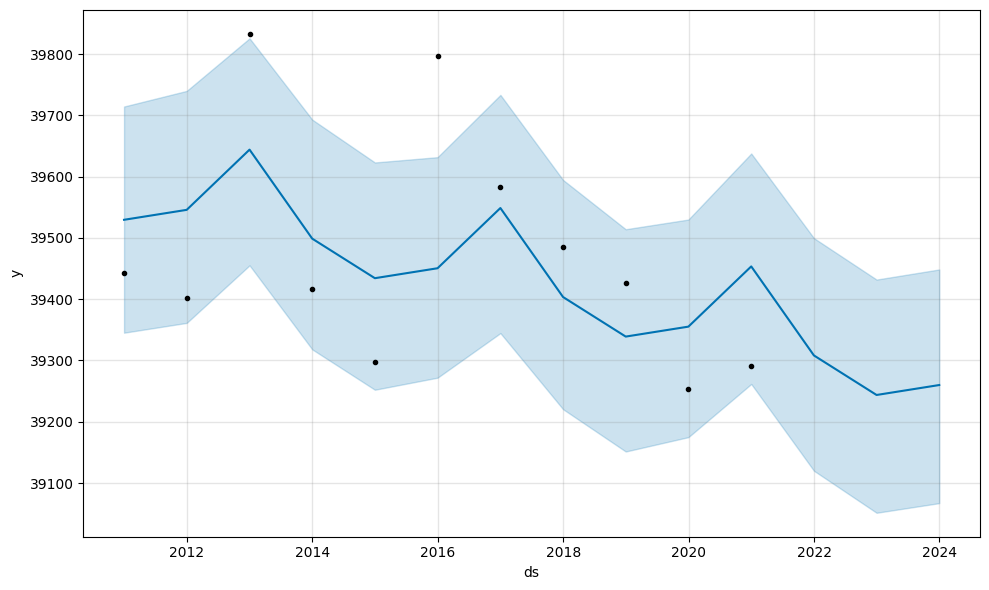

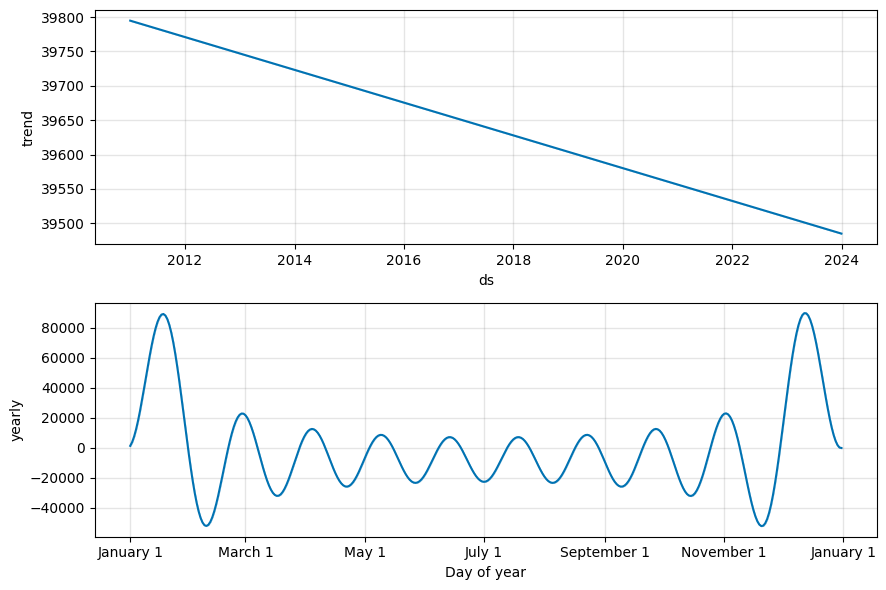

In [16]:
forecast = model.predict(future)
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

In [17]:
forecast[['ds', 'yhat']].tail(5)

,ds,yhat
9,2019-12-31,39355.256286
10,2020-12-31,39453.539179
11,2021-12-31,39308.267552
12,2022-12-31,39243.708962
13,2023-12-31,39259.944821


In [21]:
predictions = model.predict(test[['ds']])['yhat']
actuals = test['y']

print(f"Root Mean Squared Error (RMSE): {round(rmse(predictions, actuals))}")
print(f"Mean Absolute Error (MAE): {round(meanabs(predictions, actuals))}")

Root Mean Squared Error (RMSE): 94
Mean Absolute Error (MAE): 94
